In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.cluster import KMeans

sns.set()

In [3]:
raw_data = pd.read_csv('Mall_Customers.csv')
raw_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
data = raw_data.copy()
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [48]:
features = data[['Annual Income (k$)','Spending Score (1-100)']]
features.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [49]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(features)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25062.382236661244,
 21809.927562615183,
 19643.655552199736]

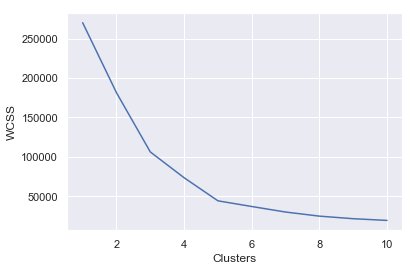

In [50]:
plt.plot(range(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
kmeans = KMeans(5)
kmeans.fit(features)

cluster_data = raw_data.copy()

pred_clusters = kmeans.fit_predict(features)

cluster_data['Cluster'] = pred_clusters
cluster_data['Gender'] = cluster_data['Gender'].map({'Male':0,'Female':1})
cluster_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,4
1,2,0,21,15,81,3
2,3,1,20,16,6,4
3,4,1,23,16,77,3
4,5,1,31,17,40,4


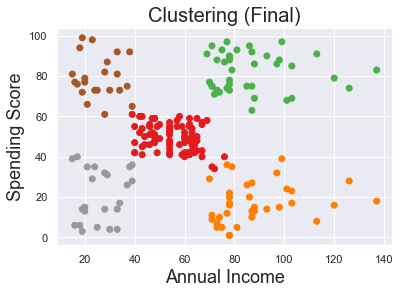

In [61]:
plt.scatter(cluster_data['Annual Income (k$)'],
            cluster_data['Spending Score (1-100)'],
           c = cluster_data['Cluster'],
           cmap = 'Set1')

plt.xlabel('Annual Income',size = 18)
plt.ylabel('Spending Score',size = 18)
plt.title('Clustering (Final)',size = 20)
plt.show()

### Result


From the analysis of the mall customer data, we can conclude that there are five different types of group. Group 1 - Low annual income and low spending score. Group 2 - Low annual income but high spending score. Group 3 - Mediocre annual income and mediocre spending score. Group 4 - High annual income but low spending score. Group 5 - High annual income as well as high spending score. 

From business perspective, we can term groups 1 and 4 as 'Alienated', group 3 as 'Roamers' and groups 2 and 5 as 'Fans'. We need to introduce some loyalty offers/bonuses to keep our fans loyal(in terms of visiting and shopping from the mall). We can bring in new products from both low price range as well as high price range to attract our alienated group. Discount offers can be introduced to both roamer and alienated groups to make them fans of the mall.